# Start by importing our data

In [1]:
import pandas as pd
import numpy as np

# Read in the data
One = pd.read_csv("merged_df.csv", index_col=0)
Two = pd.read_csv("tmdb_raw_data.csv", index_col=0)
Three = pd.read_csv("mar_22_imdb_genre_sep.csv", index_col=0)

# Now, let's see the data!

(And also do some minor data cleaning)

In [2]:
#cut the last row in One dataframe
One = One.iloc[:-1]
One.index = One.index + 1
One

,title,revenue,user_rating,votes,year,source,genre,director,runtime_in_minutes
14,The Innocent (2022 film),5.38,100,Fewer than 50 Ratings,2022,RT,Comedy,['Louis Garrel'],100
149,"Sammy Davis, Jr.: I've Gotta Be Me (page does ...",0.14,100,Fewer than 50 Ratings,2017,RT,Documentary,['Samuel D. Pollard'],100
72,The Penny Black (page does not exist),1.05,100,Fewer than 50 Ratings,2020,RT,Documentary,['Joe Saunders'],98
25,Brother's Keeper (2022 film) (page does not ex...,6.00,100,Fewer than 50 Ratings,2021,RT,Drama,['Ferit Karahan'],85
144,The Departure (2017 film),0.01,100,100+ Ratings,2017,RT,Documentary,['Lana Wilson'],87
...,...,...,...,...,...,...,...,...,...
175,Uncertain (film) (page does not exist),0.04,82,250+ Ratings,2015,RT,Documentary,"['Ewan McNicol', 'Anna Sandilands']",82
227,Henri-Georges Clouzot's Inferno,NaN,82,500+ Ratings,2009,RT,Documentary,"['Serge Bromberg', 'Ruxandra Medrea']",102
169,For the Love of Spock,19.34,82,"1,000+ Ratings",2016,RT,Documentary,['Adam Nimoy'],100
77,White Riot (film),0.85,82,Fewer than 50 Ratings,2019,RT,Documentary,['Rubika Shah'],80


In [3]:
Two

,title,director,genre,rating,revenue,length,source,votes,year
0,The Godfather,Francis Ford Coppola,"['Drama', 'Crime']",87,245.07,175,TMDB,10000+ Ratings,1972
1,The Shawshank Redemption,Frank Darabont,"['Drama', 'Crime']",87,28.34,142,TMDB,10000+ Ratings,1994
2,Cuando Sea Joven,Raúl Martínez,"['Comedy', 'Fantasy']",87,2.03,115,TMDB,100+ Ratings,2022
3,The Godfather Part II,Francis Ford Coppola,"['Drama', 'Crime']",86,102.60,202,TMDB,10000+ Ratings,1974
4,Schindler's List,Steven Spielberg,"['Drama', 'History', 'War']",86,321.37,195,TMDB,10000+ Ratings,1993
...,...,...,...,...,...,...,...,...,...
245,Rocco and His Brothers,Luchino Visconti,"['Crime', 'Drama']",81,0.01,178,TMDB,250+ Ratings,1960
246,Jojo Rabbit,Taika Waititi,"['Comedy', 'War', 'Drama']",81,82.47,108,TMDB,5000+ Ratings,2019
247,"Love, Simon",Greg Berlanti,"['Comedy', 'Drama', 'Romance']",81,66.32,110,TMDB,5000+ Ratings,2018
248,Hidden Figures,Theodore Melfi,"['Drama', 'History']",81,235.96,127,TMDB,5000+ Ratings,2016


In [4]:
Two.rename(columns={"rating": "user_rating",  "length": "runtime_in_minutes"}, inplace=True)
Two

,title,director,genre,user_rating,revenue,runtime_in_minutes,source,votes,year
0,The Godfather,Francis Ford Coppola,"['Drama', 'Crime']",87,245.07,175,TMDB,10000+ Ratings,1972
1,The Shawshank Redemption,Frank Darabont,"['Drama', 'Crime']",87,28.34,142,TMDB,10000+ Ratings,1994
2,Cuando Sea Joven,Raúl Martínez,"['Comedy', 'Fantasy']",87,2.03,115,TMDB,100+ Ratings,2022
3,The Godfather Part II,Francis Ford Coppola,"['Drama', 'Crime']",86,102.60,202,TMDB,10000+ Ratings,1974
4,Schindler's List,Steven Spielberg,"['Drama', 'History', 'War']",86,321.37,195,TMDB,10000+ Ratings,1993
...,...,...,...,...,...,...,...,...,...
245,Rocco and His Brothers,Luchino Visconti,"['Crime', 'Drama']",81,0.01,178,TMDB,250+ Ratings,1960
246,Jojo Rabbit,Taika Waititi,"['Comedy', 'War', 'Drama']",81,82.47,108,TMDB,5000+ Ratings,2019
247,"Love, Simon",Greg Berlanti,"['Comedy', 'Drama', 'Romance']",81,66.32,110,TMDB,5000+ Ratings,2018
248,Hidden Figures,Theodore Melfi,"['Drama', 'History']",81,235.96,127,TMDB,5000+ Ratings,2016


In [5]:
# reorder the columns

Two = Two.reindex(columns=['title','revenue', 'user_rating', 'votes', 'year', 'source','genre', 'director', 'runtime_in_minutes'])
Two.index = Two.index + 1
Two

,title,revenue,user_rating,votes,year,source,genre,director,runtime_in_minutes
1,The Godfather,245.07,87,10000+ Ratings,1972,TMDB,"['Drama', 'Crime']",Francis Ford Coppola,175
2,The Shawshank Redemption,28.34,87,10000+ Ratings,1994,TMDB,"['Drama', 'Crime']",Frank Darabont,142
3,Cuando Sea Joven,2.03,87,100+ Ratings,2022,TMDB,"['Comedy', 'Fantasy']",Raúl Martínez,115
4,The Godfather Part II,102.60,86,10000+ Ratings,1974,TMDB,"['Drama', 'Crime']",Francis Ford Coppola,202
5,Schindler's List,321.37,86,10000+ Ratings,1993,TMDB,"['Drama', 'History', 'War']",Steven Spielberg,195
...,...,...,...,...,...,...,...,...,...
246,Rocco and His Brothers,0.01,81,250+ Ratings,1960,TMDB,"['Crime', 'Drama']",Luchino Visconti,178
247,Jojo Rabbit,82.47,81,5000+ Ratings,2019,TMDB,"['Comedy', 'War', 'Drama']",Taika Waititi,108
248,"Love, Simon",66.32,81,5000+ Ratings,2018,TMDB,"['Comedy', 'Drama', 'Romance']",Greg Berlanti,110
249,Hidden Figures,235.96,81,5000+ Ratings,2016,TMDB,"['Drama', 'History']",Theodore Melfi,127


In [6]:
Three.rename(columns={"Title":"title", "Director":"director", "Year":"year","Genre":"genre","Revenue":"revenue","User_Rating":"user_rating","Length":"runtime_in_minutes","Source":"source","Votes":"votes" }, inplace=True)

In [7]:
Three.reindex(columns=['title','revenue', 'user_rating', 'votes', 'year', 'source','genre', 'director', 'runtime_in_minutes'])
Three.index = Three.index + 1
Three

,title,director,year,genre,revenue,user_rating,runtime_in_minutes,source,votes
1,The Shawshank Redemption,Frank Darabont,1994,['Drama '],28.34,93,142,IMDb,"250,000 votes and above"
2,The Godfather,Francis Ford Coppola,1972,"['Crime', ' Drama ']",134.97,92,175,IMDb,"250,000 votes and above"
3,The Dark Knight,Christopher Nolan,2008,"['Action', ' Crime', ' Drama ']",534.86,90,152,IMDb,"250,000 votes and above"
4,The Lord of the Rings: The Return of the King,Peter Jackson,2003,"['Action', ' Adventure', ' Drama ']",377.85,90,201,IMDb,"250,000 votes and above"
5,Schindler's List,Steven Spielberg,1993,"['Biography', ' Drama', ' History ']",96.90,90,195,IMDb,"250,000 votes and above"
...,...,...,...,...,...,...,...,...,...
246,Memories of Murder,Bong Joon Ho,2003,"['Crime', ' Drama', ' Mystery ']",0.01,81,131,IMDb,"50,000 to 100,000 votes"
247,Million Dollar Baby,Clint Eastwood,2004,"['Drama', ' Sport ']",100.49,81,132,IMDb,"50,000 to 100,000 votes"
248,Before Sunrise,Richard Linklater,1995,"['Drama', ' Romance ']",5.54,81,101,IMDb,"50,000 to 100,000 votes"
249,How to Train Your Dragon,Dean DeBlois,2010,"['Animation', ' Action', ' Adventure ...",217.58,81,98,IMDb,"50,000 to 100,000 votes"


# Let's import a few functions to create a composite score for later!

## First, we rate the movies via the following formula:
- composite_rating_score has a 50% weightage. This is calculated by multiplying the user rating (already expressed as a percentage) by the multiplier.
- the multiplier will be calculated based on the number of ratings the movie has. The more ratings the movie has, the higher the multiplier.
- revenue has a 50% weightage
- to calculate the revenue score, we first scale it according to US inflation based on number of years since the movie was released to 2023
- then we group their revenues into different bands and assign a score to each band to arrive at the revenue score

##### Therefore, composite_movie_score = composite_rating_score * 0.5 + revenue_score * 0.5

---

In [8]:
def composite_rating_score_list(DF):
    # Python Dictionary for Score Bands
    rating_to_multiplier = {
        "Fewer than 50 Verified Ratings": 0.2,
        "Fewer than 50 Ratings": 0.3,
        "50+ Ratings": 0.4,
        "100+ Ratings": 0.5,
        "50+ Verified Ratings": 0.6,
        "250+ Ratings": 0.65,
        "100+ Verified Ratings": 0.7,
        "500+ Ratings": 0.74,
        "250+ Verified Ratings": 0.78,
        "1,000+ Ratings" : 0.81,
        "1000+ Ratings": 0.81,

        "2,500+ Ratings" :0.84,
        "2500+ Ratings": 0.84,

        "5,000+ Ratings" : 0.86,
        "5000+ Ratings": 0.86,
        "10,000+ Ratings" :0.9,
        "10000+ Ratings": 0.9,

        "25,000+ Ratings" :0.95,
        "25000+ Ratings": 0.95,
        "50,000+ Ratings": 0.97,
        "25,000 to 50,000 votes": 0.98,
        "100,000+ Ratings" : 0.99,
        "50,000 to 100,000 votes": 0.99,
        "250,000+ Ratings" : 1,
        "250,000 votes and above": 1
    }

    # Vectorized Pandas Functions
    DF["user_rating"] = DF["user_rating"].astype(int)
    DF["multiplier"] = DF["votes"].map(rating_to_multiplier)
    DF["indiv_composite_rating"] = (DF["multiplier"] * DF["user_rating"] / 100).round(6)
    temp_list = DF["indiv_composite_rating"].tolist()

    return temp_list


One_test = One.copy()
One_test["indiv_composite_rating"] = composite_rating_score_list(One_test)
Two_test = Two.copy()
Two_test["indiv_composite_rating"] = composite_rating_score_list(Two_test)
Three_test = Three.copy()
Three_test["indiv_composite_rating"] = composite_rating_score_list(Three_test)

In [9]:

import numpy as np
#average inflation rate in US 1950-2022 is ~3.5%
def get_composite_revenue_score_list(DF):
    temp_list = []
    for index,row in DF.iterrows():
#        if index != 0:
               row["year"] = int(row["year"])
               year_diff = 2023 - row["year"]
               scaled_revenue = 1.035**year_diff * row["revenue"]
               temp_list.append(scaled_revenue)
               
    return temp_list

def scaled_revenue_grouped_list(list):
     bins = [0,0.01,0.1,0.25,1,2.5,10,100,250,1000,100000]
     temp_df = list
     temp_cat = pd.cut(temp_df,bins) 
     return temp_cat

# learning lesson, don't convert to pandas series to use .cut() method, use the list itself or else the thing becomes wonky for some reason?????


def revenue_score_band(list):
    # Create a dictionary to map the score band strings to their corresponding values
    score_band_dict = {
        "(0, 0.01] ": 0.1,
        "(0.01, 0.1]": 0.2,
        "(0.1, 0.25]": 0.3,
        "(0.25, 1.0]": 0.4,
        "(1.0, 2.5]": 0.5,
        "(2.5, 10.0]": 0.6,
        "(10.0, 100.0]": 0.7,
        "(100.0, 250.0]": 0.8,
        "(250.0, 1000.0]": 0.9,
        "(1000.0, 100000.0]": 1
    }
    
    # Convert each entry in the list to a string and then map it using the dictionary
    indiv_rev_score_band = [score_band_dict.get(str(x), 0) * 0.5 for x in list]


    return indiv_rev_score_band



# Now let's merge the data

In [10]:
import pandas as pd

In [11]:
# merge the dataframes

merged_df = pd.concat([One, Two, Three], ignore_index=True)
    

merged_df['genre'] = merged_df['genre'].apply(lambda x: [g.strip() for g in x.split(',')])
before_explode_mergered_df = merged_df
merged_df = merged_df.explode('genre')



for index, row in merged_df.iterrows():
    genres = row['genre']
    genres = str(genres).replace('[', '').replace(']', '')
    merged_df.at[index, 'genre'] = genres


merged_df


,title,revenue,user_rating,votes,year,source,genre,director,runtime_in_minutes
0,The Innocent (2022 film),5.38,100,Fewer than 50 Ratings,2022,RT,Comedy,['Louis Garrel'],100
1,"Sammy Davis, Jr.: I've Gotta Be Me (page does ...",0.14,100,Fewer than 50 Ratings,2017,RT,Documentary,['Samuel D. Pollard'],100
2,The Penny Black (page does not exist),1.05,100,Fewer than 50 Ratings,2020,RT,Documentary,['Joe Saunders'],98
3,Brother's Keeper (2022 film) (page does not ex...,6.00,100,Fewer than 50 Ratings,2021,RT,Drama,['Ferit Karahan'],85
4,The Departure (2017 film),0.01,100,100+ Ratings,2017,RT,Documentary,['Lana Wilson'],87
...,...,...,...,...,...,...,...,...,...
748,How to Train Your Dragon,217.58,81,"50,000 to 100,000 votes",2010,IMDb,' Adventure ',Dean DeBlois,98
748,How to Train Your Dragon,217.58,81,"50,000 to 100,000 votes",2010,IMDb,' Adventure ',Dean DeBlois,98
749,Groundhog Day,70.91,81,"50,000 to 100,000 votes",1993,IMDb,' Fantasy ',Harold Ramis,101
749,Groundhog Day,70.91,81,"50,000 to 100,000 votes",1993,IMDb,' Fantasy ',Harold Ramis,101


### The below will be important later!

In [12]:
merged_df["source"].value_counts()

IMDb    634
TMDB    624
RT      250
Name: source, dtype: int64

### But moving on for now...

In [13]:
for index,row in merged_df.iterrows():
    temp_var = row['genre']
    temp_var = str(temp_var).replace("'", "").replace(" ", "")
    merged_df.loc[index, 'genre'] = temp_var

merged_df.value_counts('genre')
cleaned_merged_df = merged_df

### We quickly realised that the genres aren't the same wording for all sources, so let's fix that!

In [14]:
#Mystery&amp;thriller = Thriller
#Sci-fi = Sci-Fi
#Biography = Documentary
#muscial = Drama
#History = Documentary

merged_df['genre'] = merged_df['genre'].replace('Mystery&amp;thriller', 'Thriller')
merged_df['genre'] = merged_df['genre'].replace('Sci-Fi', 'Sci-fi')
merged_df['genre'] = merged_df['genre'].replace('Biography', 'Documentary') 
merged_df['genre'] = merged_df['genre'].replace('Musical', 'Drama')
merged_df['genre'] = merged_df['genre'].replace('History', 'Documentary')


#remove the following genres as their sample size is too small (<30 movies)
merged_df['genre'] = merged_df['genre'].replace('Horror', '')
merged_df['genre'] = merged_df['genre'].replace('TVMovie', '')
merged_df['genre'] = merged_df['genre'].replace('Film-Noir', '')
merged_df['genre'] = merged_df['genre'].replace('Holiday', '')
merged_df['genre'] = merged_df['genre'].replace('Sport', '')
merged_df['genre'] = merged_df['genre'].replace('Animation', '')
merged_df['genre'] = merged_df['genre'].replace('Western', '')
merged_df["genre"].value_counts()

# Note: it is not entirely accurate to replace Mystery&amp;thriller with Thriller as there are some movies that are only Mystery and not Thriller. 


Drama          344
Documentary    151
Thriller       150
Romance        117
Fantasy        102
Sci-fi          97
War             92
Crime           76
Comedy          73
Mystery         69
                67
Adventure       56
Family          43
Action          38
Music           33
Name: genre, dtype: int64

# Let's start exploring the data!

- We decided to focus one examining sources instead of directors now, following advice received from our teachers during the final group presentaion

# _Section 1: Is there a preference of certain genres according to sources, as examined by absolute user ratings and absolute representation?_

#### Beginning with a graph of _average_ *user ratings* by genre (no composite score yet)

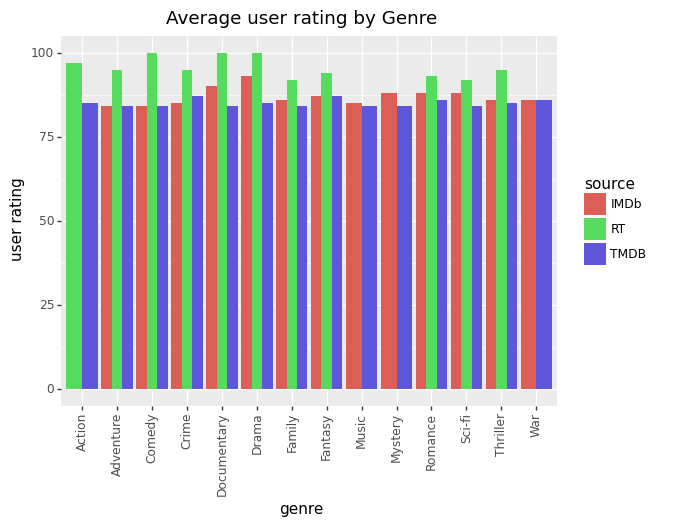

<ggplot: (145247567661)>

In [15]:
# plot a graph of user_rating over genre with 3 bar graphs for each data source
from plotnine import *


#exclude genres with too few movies,
genres_to_exclude = ['']

filtered_df = merged_df[~merged_df['genre'].isin(genres_to_exclude)]

(ggplot(filtered_df, aes(x='genre', y='user_rating', fill='source')) + geom_bar(stat = "identity", position=position_dodge(width=0.9)) + theme(axis_text_x=element_text(angle=90))
 + labs(title="Average user rating by Genre", x="genre", y="user rating")
 
 )

##### As you can see, there seems to be generally higher user ratings for Rotten Tomatoes
 - The reason seems unclear
 - Not obvious that RT voters are more optimistic - maybe instead the interface for RT is more forgiving or IMDb or TMDB more harsh

 #### However, we see that there's no significant variation in user ratings among genres between sources. 
 
 # <span style = "color:red">Perhaps, users are indifferent between genres acorss all platforms?</span>

#### Now let's see a graph of the number of top movies by genres so we can see if a source gives "preferential" treatment to those from a different source!

(For example, maybe IMDb really likes horror movies. If so, then we should see alot more horror movies!)

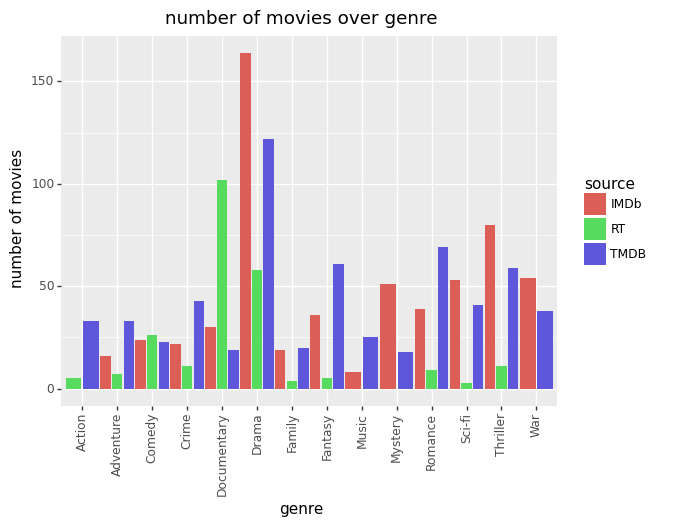

<ggplot: (145245861557)>

In [16]:
genres_to_exclude = ['']

# Learning lesson = "~" means "filter out"
# keyword on OUT in "filter out". This means that all boolean true values are removed
# Learning lesson = isin() literally just gives a boolean mask of true false values that checks if something is in something
# in this case, it finds if any genres in merged_df is in genres_to_exclude and returns a true value if so. the ~ filters OUT the ones with True values
filtered_df = merged_df[~merged_df['genre'].isin(genres_to_exclude)]

#By default, geom_bar() uses the stat="count" transformation, which counts the number of observations in each group (defined by the x aesthetic) and plots the counts as the height of the bars
#However, if you set stat="identity", ggplot will plot the values in the data directly as the heights of the bars, without applying any statistical transformation.
#This is useful when you already have precomputed heights for the bars, or when you want to plot values other than counts (e.g. means, medians, etc.) as the heights of the bars.





(ggplot(filtered_df, aes(x="genre", fill="source"))
 
 + geom_bar( position = position_dodge(width = 1))
 + theme(axis_text_x = element_text(angle = 90))

 + labs (x= "genre", y= "number of movies", title = "number of movies over genre")

)

#### See anything weird? Yup - there are alot more movies in IMDb and TMDb! Why is this the case? Well because although there are ~250 movies for each source, we exploded them earlier. 

- For RT, each movies only has ONE source
- But for IMDb and TMDb, each movie has more than one source!

---

#### So how do we fix this? Well remember the value counts from earlier? We could "scale" down each number of movies proprotionately so that the total representation for each source is the same!

- First, we could find out a "divider" which comprises of (total number of rows from each source/250), where 250 is the base each original dataframe has 250 movies/entries
- Then, we could divide the number of movies in each genre in each source by their respective divider!
- Finally, we could plot the graph! 
- The resulting area under each source's graph should all add up to be the same across each source

In [17]:
filtered_df["source"].value_counts()

TMDB    604
IMDb    596
RT      241
Name: source, dtype: int64

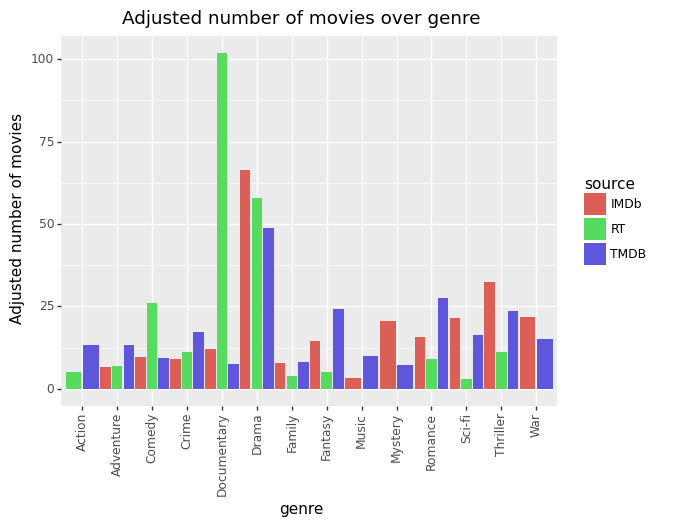

<ggplot: (145282228121)>

In [18]:
count_df = filtered_df.groupby(['genre', 'source']).size().reset_index(name='counts')
def adjust_counts(row):
    if row["source"] == "IMDb":
        return row['counts'] / (596 / 241)
    elif row["source"] == "TMDB":
        return row['counts'] / (604 / 241)
    elif row["source"] == "RT":
        return row['counts']
    else:
        return row['counts']  # default case, adjust as necessary

count_df['adjusted_counts'] = count_df.apply(adjust_counts, axis=1)
from plotnine import ggplot, aes, geom_bar, theme, element_text, labs, position_dodge

(ggplot(count_df, aes(x="genre", y='adjusted_counts', fill="source"))
 
 + geom_bar( position = position_dodge(width = 1), stat="identity")
 + theme(axis_text_x = element_text(angle = 90))

 + labs (x= "genre", y= "Adjusted number of movies", title = "Adjusted number of movies over genre")

)


#### As we can see in this better graph, there seems to be a HUGE representation of Documentary type movies for just Rotten Tomatoes! 

- However, beyond that we can see that there are there is alot of Drama movies across all sources (most for IMDb and TMDB, and 2nd for RT)
- Potential inferrence might mean that on average, many people like Drama type movies!
- However, there might be other confounding variables, like maybe there are just a greater proportion of Drama movies made, so naturally more are highly rated
- We can also see the RT does not have movies in certain genres like War, Mystery or Music! However, this is due to the fact that there aren't categories for this on RT.
- Other sources also don't have certain genres like Action for IMDb
- No clear r/s for other genres

# <span style = "color:red"> In conclusion, data from user ratings suggest no preference for genres. However, data from represenation of top movies seems to indicate a potential preference for Documentary genres. However, as we would soon find out in section 2, this isn't the case! </span>

---

# _Section 2: Examining difference in composite scores, to see if there are any discrepances or patterns in absolute user score, number of voters, absolute revenue and date of release - to see if users prefer a certain genre within each source and between each source_

# Now let's look at the composite score!

- As a reminder, composite score consists of 4 components
    - User score
    - Number of users who rated
    - Revenue
    - Date of release (revenue was scaled up due to inflation)

<br>
Remember those functions from earlier? They are relevant here!


In [19]:
filtered_df_with_composite_score = filtered_df.copy()
filtered_df_with_composite_score = filtered_df_with_composite_score.dropna()

filtered_df_with_composite_score.loc[:,"composite_rating_score"] = composite_rating_score_list(filtered_df_with_composite_score)
filtered_df_with_composite_score.loc[:,"scaled_revenue"] = (get_composite_revenue_score_list(filtered_df_with_composite_score))
filtered_df_with_composite_score.loc[:,"scaled_revenue_grouped"] = scaled_revenue_grouped_list(get_composite_revenue_score_list(filtered_df_with_composite_score))
filtered_df_with_composite_score.loc[:,"revenue_score"] = revenue_score_band(scaled_revenue_grouped_list(get_composite_revenue_score_list(filtered_df_with_composite_score)))
filtered_df_with_composite_score.loc[:,"overall_composite_movie_score"] = (filtered_df_with_composite_score["composite_rating_score"]/2) + filtered_df_with_composite_score["revenue_score"]

filtered_df_with_composite_score = filtered_df_with_composite_score.sort_values(by=['overall_composite_movie_score'], ascending=False)

In [20]:
# now calculate the average overall_composite_movie_score for each genre for each source

average_overall_composite_movie_score_by_genre_by_source = pd.DataFrame(
filtered_df_with_composite_score.groupby(['genre', 'source'])['overall_composite_movie_score'].mean())


# change the index to a column starting at 0
average_overall_composite_movie_score_by_genre_by_source = average_overall_composite_movie_score_by_genre_by_source.reset_index()
average_overall_composite_movie_score_by_genre_by_source.index = average_overall_composite_movie_score_by_genre_by_source.index + 1
average_overall_composite_movie_score_by_genre_by_source

,genre,source,overall_composite_movie_score
1,Action,RT,0.678300
2,Action,TMDB,0.772862
3,Adventure,IMDb,0.808994
4,Adventure,RT,0.280000
5,Adventure,TMDB,0.760267
6,Comedy,IMDb,0.859793
7,Comedy,RT,0.750387
8,Comedy,TMDB,0.674859
9,Crime,IMDb,0.707478
10,Crime,RT,0.853400


In [21]:
# calculate the average overall_composite_movie_score for each source
filtered_df_with_composite_score.groupby(['source'])['overall_composite_movie_score'].mean()

source
IMDb    0.794411
RT      0.600122
TMDB    0.699101
Name: overall_composite_movie_score, dtype: float64

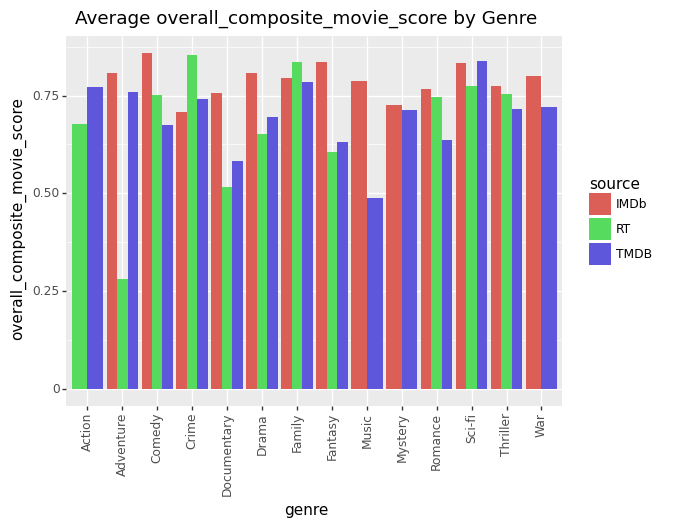

<ggplot: (145282619477)>

In [22]:
# plot a graph of average overall_composite_movie_score over genre with 3 bar graphs for each data source

(ggplot(average_overall_composite_movie_score_by_genre_by_source, 
        aes(x='genre', y='overall_composite_movie_score', fill='source')) +
        geom_bar(stat = "identity", position=position_dodge(width=0.9)) +
        theme(axis_text_x=element_text(angle=90)) +
        labs(title="Average overall_composite_movie_score by Genre", x="genre", y="overall_composite_movie_score")
        
        )



- From the above graph, no clear pattern of composite scores within genres :(
- Even the Documentary genre for RT isn't higher than the rest despite over-representation shown earlier -> points to other factors causing over-representation besides the hypothesis that RT users like Documentaries
    - <span style = "color:red">This gives evidence to refute our initial findings in section 1, that there might be a slight preference for Documentary genres within Rotten Tomatoes sources! </span>

### <span style = "color:red">However, from the table/block of code above the graph's code, crucially, RT has the lowest average overall score across all genres (data above graph) followed by TMDB and IMDB.</span>



- Why is this the case?

- Recall composite score is made from 4 components

    - User score
    - Number of users who voted for said score
    - Revenue
    - Year of release
      
<br>

- So which of these 4 components is contributing most? Let's find out!

In [23]:
# now calculate the average revenue_score for each genre for each source

average_revenue_score_by_genre_by_source = pd.DataFrame(
filtered_df_with_composite_score.groupby(['genre', 'source'])['revenue_score'].mean())


# change the index to a column starting at 0
average_revenue_score_by_genre_by_source = average_revenue_score_by_genre_by_source.reset_index()
average_revenue_score_by_genre_by_source.index = average_revenue_score_by_genre_by_source.index + 1

# calculate the average revenue_score for each source

filtered_df_with_composite_score.groupby(['source'])['revenue_score'].mean()

source
IMDb    0.380730
RT      0.294118
TMDB    0.362549
Name: revenue_score, dtype: float64

### As we can see, RT is the lowest, followed by TMDB and IMDB. This matches the earlier pattern, so revenue explains it!

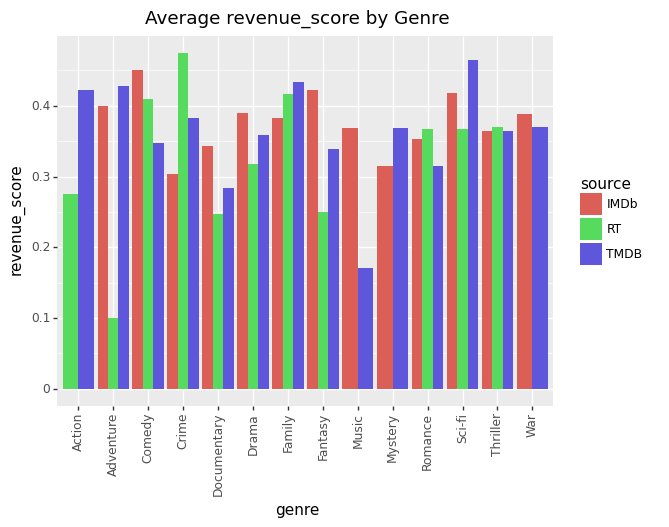

<ggplot: (145284867949)>

In [24]:
# plot a graph of average revenue_score over genre with 3 bar graphs for each data source

(ggplot(average_revenue_score_by_genre_by_source,
        aes(x='genre', y='revenue_score', fill='source')) +
        geom_bar(stat = "identity", position=position_dodge(width=0.9)) +
        theme(axis_text_x=element_text(angle=90)) +
        labs(title="Average revenue_score by Genre", x="genre", y="revenue_score")

        )


### The graph also tells a similar story! RT spiked in the graph of average overall composite score earlier for the crime genre. Similarly, we see a spike for average revenue score for Crime genre here as well.

- But remember the revenue score is made from absolute revenue and year of release
- So which factor matters most?
- Let's investigate years! If it isn't the reason, then it must be absolute revenue!

In [25]:
# Now let's at years

# now calculate the average year for each genre for each source

average_year_by_genre_by_source = pd.DataFrame(
filtered_df_with_composite_score.groupby(['genre', 'source'])['year'].mean())


# change the index to a column starting at 0
average_year_by_genre_by_source = average_year_by_genre_by_source.reset_index()
average_year_by_genre_by_source.index = average_year_by_genre_by_source.index + 1

# calculate the average year for each source
filtered_df_with_composite_score.groupby(['source'])['year'].mean()

source
IMDb    1991.488844
RT      1998.405229
TMDB    1996.438735
Name: year, dtype: float64

### As we can see, the years are clearly not a factor. The order is reversed and differences minimal. 

# **This means the differences are attributed primarily to absolute revenue!**

# <span style = "color:red"> In other words, while it seems that there is no preference (or conflicting evidence) as to whether there are preferences between genres within or between sources, our data seems to suggest movies with a higher absolute revenue are over-represented in IMDb and TMDB relative to Rotten Tomatoes! </span>

- <span style = "color:yellow">A possible explanation could be that IMDb and TMDB are more popular sites than Rotten Tomatoes. Hence, movies with higher revenues (and hence more overall customers), visit sites like IMDb and TMDB more relative to RT! (obviously, this is just a hypothesis. Correlation =/= causation)</span>

#### Let's skip the graph for this one (since we already know it doesn't explain the data from overall composite score) and move on to user composite score
 - Again, remember the user composite score is made of absolute user rate & number of users

     - User composite score = function(absolute user rating, number of users)
     - Revenue composite score = function(revenue at time of release, year of release) 
     
    <br>

 - Total score = function(User composite score, revenue composite score)

In [26]:
# now calculate the average composite_rating_score for each genre for each source

average_composite_rating_score_by_genre_by_source = pd.DataFrame(
filtered_df_with_composite_score.groupby(['genre', 'source'])['composite_rating_score'].mean())


# change the index to a column starting at 0
average_composite_rating_score_by_genre_by_source = average_composite_rating_score_by_genre_by_source.reset_index()
average_composite_rating_score_by_genre_by_source.index = average_composite_rating_score_by_genre_by_source.index + 1

# calculate the average composite_rating_score for each source
filtered_df_with_composite_score.groupby(['source'])['composite_rating_score'].mean()

source
IMDb    0.827361
RT      0.612008
TMDB    0.673103
Name: composite_rating_score, dtype: float64

### Promising! Same pattern here (RT -> TMDB -> IMDb)

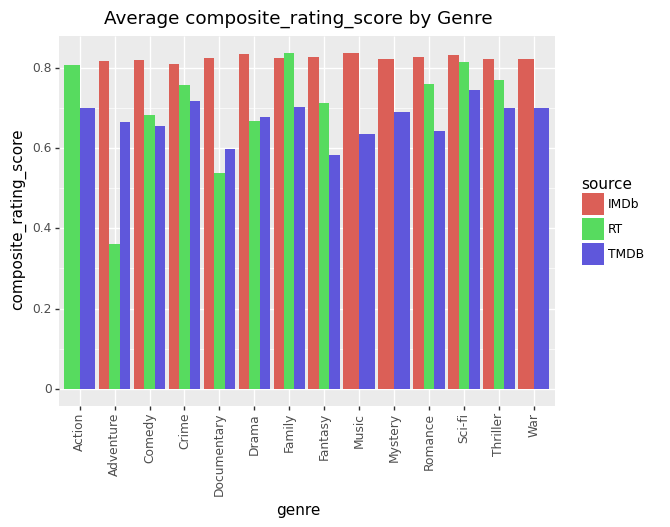

<ggplot: (145286092101)>

In [27]:
# plot a graph of average composite_rating_score over genre with 3 bar graphs for each data source

(ggplot(average_composite_rating_score_by_genre_by_source,
        aes(x='genre', y='composite_rating_score', fill='source')) +
        geom_bar(stat = "identity", position=position_dodge(width=0.9)) +
        theme(axis_text_x=element_text(angle=90)) +
        labs(title="Average composite_rating_score by Genre", x="genre", y="composite_rating_score")

        )


### However, graph seems to only partially confirm our suspicion.
- In the overall composite score, action for RT was low relative to TMDB, but now it is high.
- However, some similarities are present - spike in Family genre for RT in overall composite, and same here in this graph of composite user rating
- This is different from the graph of average revenue score by genre, where the peaks very closely match the original overall composite score

# **Taken together, it seems that the composite user rating score only partially explains the lower average total score for RT, but doesn't explain to the same extent as revenue composite!**

- Now let's see if absolute user rating or number of voters matters more by examining absoluter rating

In [28]:
# now calculate the average user_rating for each genre for each source

average_rating_by_genre_by_source = pd.DataFrame(
filtered_df_with_composite_score.groupby(['genre', 'source'])['user_rating'].mean())


# change the index to a column starting at 0
average_rating_by_genre_by_source = average_rating_by_genre_by_source.reset_index()
average_rating_by_genre_by_source.index = average_rating_by_genre_by_source.index + 1

# calculate the average user_rating for each source
filtered_df_with_composite_score.groupby(['source'])['user_rating'].mean()

source
IMDb    83.322515
RT      89.359477
TMDB    82.549407
Name: user_rating, dtype: float64

- Seems obvious that absolute ratings aren't the reason contributing to the composite user rating order between sources as the order here doesn't match the order previously (instead of RT being lowest and IMDb being highest, now RT is highest)
- Instead, it seems like the number of voters are the major reason!
- Similar to the revenue composite where we examine years, it seems now it is absolute user rating that isn't a big factor

#### In conclusion, it seems that it is _**number of voters**_ that explains the trend we see in composite user rating and overall composite score

# <span style = "color:red"> Hence, this supports the idea that IMDb and TMDB are more popular sites than Rotten Tomatoes! If IMDb and TMDB are more popular, those sites would get more voters for popular movies. Indeed, this is what we see!
(Note again here, this is just a hypothesis. Correlation =/= causation. Reverse casuality might happen here - perhaps because there are more votes on sites like IMDb and TMDB, they become more popular with mainstream and casual audiences, which explains why movies with higher revenus (that are frequented by mainstream audiences, go to those sites leading to over representation of high revenue movies in IMDb and TMDB.)) </span>


---

# _Appendix/ Section 3: Even more evidence to support popularity of IMDb and TMDB compared to RT_



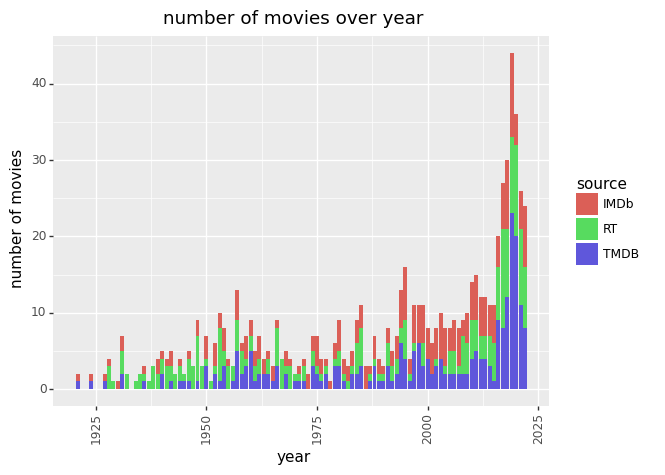

<ggplot: (145286073525)>

In [29]:
for index, row in before_explode_mergered_df.iterrows():
    genres = row['genre']
    genres = str(genres).replace('[', '').replace(']', '')
    before_explode_mergered_df.at[index, 'genre'] = genres


# Plotting the graph of number of movies per year

(ggplot(before_explode_mergered_df, aes(x='year', fill= 'source')) + geom_bar() + theme(axis_text_x=element_text(angle=90))
 + labs(title = "number of movies over year", y = "number of movies")
 
 )

- As you can see, there seems to be a greater proportion of RT movies from an essentially equal (yes RT was chosen based in order on how highly rated it is, but so where others) sample of movies from all 3 sources
## <span style = "color:red"> **Perhaps, this points to the fact that IMDb and TMDB are more popular in recent times compared to RT!**</span>

# <span style = "color:red">**Summary** </span>

### <span style = "color:yellow">**Section I**: Is there a preference of certain genres according to sources, as examined by absolute user ratings and absolute representation?</span>

- In Part I, we tried to see if we can infer anything from the graphs of average absolute user rating by genre across 3 sources
- We saw that RT users tend to vote more optimistically compared to IMDb and TMDB on average
- However, we find no substantial differences/preferences for 1 genre relative to the other within genres by eyeballing the data and seeing how any differences are not consistent across sources, and were minimal fluctuations at best (relative to total ratings)

<br>



- Still in part I, we also plotted a graph of the number of top movies by genres so we can see if a source gives "preferential" treatment to those from a different source
- (For example, maybe IMDb really likes horror movies. If so, then we should see alot more horror movies!)
#### As we saw from the adjusted graph, there seems to be a HUGE representation of Documentary type movies for just Rotten Tomatoes!
- After doing some adjustment, we found that there is there is alot of Drama movies across all sources (most for IMDb and TMDB, and 2nd for RT)
- Potential inferrence might mean that on average, many people like Drama type movies!
- However, there might be other confounding variables, like maybe there are just a greater proportion of Drama movies made, so naturally more are highly rated
- We can also see the RT does not have movies in certain genres like War, Mystery or Music! However, this is due to the fact that there aren't categories for this on RT
- No clear relationship for other genres



## <span style = "color:red"> In conclusion, data from user ratings suggest no preference for genres. However, data from represenation of top movies seems to indicate a potential preference for Documentary genres. However, as we would soon find out in section 2, this isn't the case! </span>

## <span style = "color:yellow">**Section II**: Examining difference in composite scores, to see if there are any discrepances or patterns in absolute user score, number of voters, absolute revenue and date of release - to see if users prefer a certain genre within each source and between each source</span>

- Firstly, we began by calculating the overall compossite score
<br>
- The composite score = function(User composite score, revenue composite score)

- User composite score = function(absolute user rating, number of users)
- Revenue composite score = function(revenue at time of release, year of release) 

- Hence, composite score consists of 4 components
    - User score
    - Number of users who rated
    - Revenue
    - Date of release (revenue was scaled up due to inflation)

<br>
<br>
-- We then plot a graph of average overall_composite_movie_score over genre with 3 bar graphs for each data source

- We again find no clear pattern of composite scores within genres
 Even the Documentary genre for RT isn't higher than the rest despite over-representation shown earlier
- This points to other factors causing over-representation besides the hypothesis that RT users like Documentaries
- <span style = "color:red">This gives evidence to refute our initial findings in section 1, that there might be a slight preference for Documentary genres within Rotten Tomatoes sources! </span>
- <span style = "color:red">However, we find crucual data that RT has the lowest average overall score across all genres (data above graph) followed by TMDB and IMDB.</span>

<br>


-- We then tried to find out which of the 4 components contributed to this trend by sketching appropriate graphs
- By plotting a graph of average revenue_score over genre with 3 bar graphs for each data source amoung other things, we can see, RT is the lowest, followed by TMDB and IMDB. This matches the earlier pattern, so revenue explains it!
- Since revenue composite score is made up of revenue at time of release (Absolute revenue) and year of release we did further analysis via graphs to see which factor exactly contribues to this trend
- From the data we can see, the years are clearly not a factor. The order is reversed and differences minimal

<br>



-- We next examined user composite score and see the sme pattern of (RT -> TMDB -> IMDb) for user composite score
- However, data/graph seems to only partially confirm this as only some patterns are explained but not others in the graph
<br>

---
<br>
-- Moving to the next half, we analysed the data to see which of the 2 components in user composite (user rating or number of voters) contribute to the trend

- The data seems obvious that absolute ratings aren't the reason contributing to the composite user rating order between sources as the order there doesn't match the order previously (instead of RT being lowest and IMDb being highest, now RT is highest)
- Instead, it seems like the number of voters are the major reason!
- <span style = "color:red">In conclusion, it seems that it is _**number of voters**_ that explains the trend we see in composite user rating and overall composite score </span>



## <span style = "color:red"> In other words, while it seems that there is no preference (or conflicting evidence) as to whether there are preferences between genres within or between sources, our data seems to suggest movies with a higher absolute revenue are over-represented in IMDb and TMDB relative to Rotten Tomatoes! </span>

## <span style = "color:red">A possible explanation could be that IMDb and TMDB are more popular sites than Rotten Tomatoes. Hence, movies with higher revenues (and hence more overall customers), visit sites like IMDb and TMDB more relative to RT! (obviously, this is just a hypothesis but seems to be supported. Correlation =/= causation)</span>
## <span style="color:red">Taken together, it seems that the composite user rating score only partially explains the lower average total score for RT, but doesn't explain to the same extent as revenue composite!</span>

<br>

### <span style = "color:yellow">**Section III**: Appendix/ Section 3: Even more evidence to support popularity of IMDb and TMDB compared to RT</span>

- We plot a graph of number of movies over their release date
- The graph clearly shows that there is a significant over-representation of RT movies in pre-modern times and under-representation in modern times
- Given that the sample of movies across 3 sources were essentially chosen randomly, <span style = "color:red"> perhaps, this points to the fact that IMDb and TMDB are more popular in recent times compared to RT!</span>


## <span style="color:red"> A potential explanation for this data is that IMDB and TMDB are more popular in recent years especially compared to RT! </span>



# <span style = "color:red">**Conclusion** </span>

- In conclusion, we think there is no strong evidence that there is a preference for a genere within or across genres
- Examining the graph of absolute user ratings over genres over 3 sources, we see that there is no significant pattern of preference for a single genre (as variations are relatively small) & across sources (no pattern across sources)
<br>
- We also plotted a graph showing representation of movies by genre from a essentially random sample
- While it seems like RT users might have a preference for that Documentary movies, as they are over-represented, the data from absolute user scores and later composite user and composite overall scores suggest otherwise

### - This points to the fact that there is no preference for genres within or across genres

- However, our data shows support for the hypothesis that IMDb and TMDB are more popular compared to RT
- This is because of three reasons
    - IMDb and TMDB have, on average, a greater representation of higher grossing flims than RT even as their average release year across sources are similar
    - IMDb and TMDB have, on average, more voters than RT even as their average absolute user rating is about the same
    - IMDb and TMDB represent a significantly greater proportion of modern flims compared to RT

### - All these evidences suggest that IMDb and TMDB are more popular sites in modern times than RT. With a greater popularity, more viewers vote (evidence 2), and more viewers review higher grossing flims (evidence 3) than lower ones as higher ones are more popular leading to a higher absolute gap, in the context of the modern era (evidence 3). 
